# Try different models

This jupyter notebook is dedicated to training and evaluating different models

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
import random

## 1. Open and view all the files

In [48]:
train=pd.read_csv('../data/flat_train.csv',index_col=0)
test=pd.read_csv('../data/flat_test.csv',index_col=0)
IC50=pd.read_csv('../data/flat_IC50.csv',index_col=0)
isolates_list = [line.rstrip('\n') for line in open('../data/isolates.txt')]
isolates_list_test = [line.rstrip('\n') for line in open('../data/isolates_test.txt')]
genes_column_labels_df=pd.read_csv('../data/genes_column_labels.csv',index_col=0)
genes_list = [line.rstrip('\n') for line in open('../data/genes_to_keep.txt')]

In [3]:
train.head()

,PF3D7_1340700_24HR_DHA,PF3D7_1340700_24HR_UT,PF3D7_1340700_6HR_DHA,PF3D7_1340700_6HR_UT,PF3D7_1246100_24HR_DHA,PF3D7_1246100_24HR_UT,PF3D7_1246100_6HR_DHA,PF3D7_1246100_6HR_UT,PF3D7_0106800_24HR_DHA,PF3D7_0106800_24HR_UT,...,PF3D7_0626800_DHA_UT_6HR,PF3D7_0626800_DHA_UT_24HR,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1457000_24_6HR_UT,PF3D7_1457000_DHA_UT_6HR,PF3D7_1457000_DHA_UT_24HR,PF3D7_1361800_24HR_6HR_DHA,PF3D7_1361800_24_6HR_UT,PF3D7_1361800_DHA_UT_6HR,PF3D7_1361800_DHA_UT_24HR
isolate_01,-0.407052,-0.454890,0.240787,-0.323857,1.010718,1.297258,0.878644,0.462625,-0.174305,0.026291,...,-0.861167,-0.788560,-0.449115,0.103816,-0.387161,-0.940092,-0.204190,-0.306021,0.607113,0.708944
isolate_02,0.013135,-0.288905,0.156844,-0.258988,0.929380,1.122397,0.590085,1.358618,-0.556308,-0.449670,...,0.638573,-0.022643,-0.044861,-0.012785,0.488644,0.456568,-0.280932,0.137645,0.074284,-0.344293
isolate_03,0.048070,-0.340294,-0.135059,-0.284724,1.046211,1.230160,0.508137,0.867778,0.921045,-0.025513,...,1.312910,0.855652,-0.861166,0.302824,1.743635,0.579645,0.586608,-0.008594,-0.708807,-0.113605
isolate_04,-0.072510,-0.545671,-0.385077,-0.304287,0.965489,1.154897,0.879867,1.587606,0.367313,-0.390621,...,0.640146,-0.186046,-0.064471,0.092535,0.253309,0.096304,-0.065763,-1.011158,-0.072207,0.873189
isolate_05,-0.226061,-0.371508,-0.262047,-0.062498,1.234422,1.881968,1.436707,0.874129,-0.399773,-1.257496,...,-0.223396,1.337816,-0.006811,-1.209072,0.150276,1.352536,-0.197253,1.041507,0.677745,-0.561015


In [4]:
IC50.head()

,DHA_IC50
isolate_01,2.177
isolate_02,1.697
isolate_03,1.799
isolate_04,0.710
isolate_05,2.025


In [5]:
test.head()

,PF3D7_1340700_24HR_DHA,PF3D7_1340700_24HR_UT,PF3D7_1340700_6HR_DHA,PF3D7_1340700_6HR_UT,PF3D7_1246100_24HR_DHA,PF3D7_1246100_24HR_UT,PF3D7_1246100_6HR_DHA,PF3D7_1246100_6HR_UT,PF3D7_0106800_24HR_DHA,PF3D7_0106800_24HR_UT,...,PF3D7_0626800_DHA_UT_6HR,PF3D7_0626800_DHA_UT_24HR,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1457000_24_6HR_UT,PF3D7_1457000_DHA_UT_6HR,PF3D7_1457000_DHA_UT_24HR,PF3D7_1361800_24HR_6HR_DHA,PF3D7_1361800_24_6HR_UT,PF3D7_1361800_DHA_UT_6HR,PF3D7_1361800_DHA_UT_24HR
isolate_31,-0.083810,-0.237601,-0.393627,0.157657,1.241742,0.892842,0.944031,1.185809,-0.584764,-1.392044,...,-1.183098,0.495186,0.059165,-0.586973,-0.565675,0.080463,-0.555443,0.797244,0.992569,-0.360118
isolate_32,-0.100321,-0.315922,-0.205521,-0.549832,0.499754,1.074672,0.484960,1.243588,-0.369133,0.305464,...,0.529374,0.228348,-0.479942,-0.070097,0.490606,0.080761,0.248413,-1.265139,-1.552093,-0.038541
isolate_33,-0.306169,-0.196336,-0.129218,-0.254396,1.711083,0.716859,0.887892,1.320313,0.176647,-1.046201,...,0.592113,0.538705,0.148453,-0.215818,-0.019406,0.344865,-0.061137,-0.450015,-0.265031,0.123846
isolate_34,0.108025,-0.107807,-0.210586,-0.346967,0.856864,0.916836,0.771997,1.151976,0.257807,0.219475,...,-0.041319,0.201217,0.477662,-0.799427,-1.046440,0.230649,-0.277628,0.877974,1.153233,-0.002368
isolate_35,-0.383524,-0.542011,-0.383707,-0.488203,1.240874,0.366477,0.248377,0.872176,-0.288073,0.539267,...,1.450840,-0.549614,-0.840660,1.094264,1.443738,-0.491185,1.181817,-0.896510,-2.229431,-0.151104


In [6]:
isolates_list

['isolate_01',
 'isolate_02',
 'isolate_03',
 'isolate_04',
 'isolate_05',
 'isolate_06',
 'isolate_07',
 'isolate_08',
 'isolate_09',
 'isolate_10',
 'isolate_11',
 'isolate_12',
 'isolate_13',
 'isolate_14',
 'isolate_15',
 'isolate_16',
 'isolate_17',
 'isolate_18',
 'isolate_19',
 'isolate_20',
 'isolate_21',
 'isolate_22',
 'isolate_23',
 'isolate_24',
 'isolate_25',
 'isolate_26',
 'isolate_27',
 'isolate_28',
 'isolate_29',
 'isolate_30']

In [7]:
genes_column_labels_df

,PF3D7_1340700,PF3D7_1246100,PF3D7_0106800,PF3D7_1431300,PF3D7_1426500,PF3D7_1216500,PF3D7_0418500,PF3D7_0821800,PF3D7_1432700,PF3D7_1463700,...,PF3D7_0417100,PF3D7_1332000,PF3D7_1204300,PF3D7_0729400,PF3D7_0820700,PF3D7_1320500,PF3D7_0109400,PF3D7_0626800,PF3D7_1457000,PF3D7_1361800
0,PF3D7_1340700_24HR_DHA,PF3D7_1246100_24HR_DHA,PF3D7_0106800_24HR_DHA,PF3D7_1431300_24HR_DHA,PF3D7_1426500_24HR_DHA,PF3D7_1216500_24HR_DHA,PF3D7_0418500_24HR_DHA,PF3D7_0821800_24HR_DHA,PF3D7_1432700_24HR_DHA,PF3D7_1463700_24HR_DHA,...,PF3D7_0417100_24HR_DHA,PF3D7_1332000_24HR_DHA,PF3D7_1204300_24HR_DHA,PF3D7_0729400_24HR_DHA,PF3D7_0820700_24HR_DHA,PF3D7_1320500_24HR_DHA,PF3D7_0109400_24HR_DHA,PF3D7_0626800_24HR_DHA,PF3D7_1457000_24HR_DHA,PF3D7_1361800_24HR_DHA
1,PF3D7_1340700_24HR_UT,PF3D7_1246100_24HR_UT,PF3D7_0106800_24HR_UT,PF3D7_1431300_24HR_UT,PF3D7_1426500_24HR_UT,PF3D7_1216500_24HR_UT,PF3D7_0418500_24HR_UT,PF3D7_0821800_24HR_UT,PF3D7_1432700_24HR_UT,PF3D7_1463700_24HR_UT,...,PF3D7_0417100_24HR_UT,PF3D7_1332000_24HR_UT,PF3D7_1204300_24HR_UT,PF3D7_0729400_24HR_UT,PF3D7_0820700_24HR_UT,PF3D7_1320500_24HR_UT,PF3D7_0109400_24HR_UT,PF3D7_0626800_24HR_UT,PF3D7_1457000_24HR_UT,PF3D7_1361800_24HR_UT
2,PF3D7_1340700_6HR_DHA,PF3D7_1246100_6HR_DHA,PF3D7_0106800_6HR_DHA,PF3D7_1431300_6HR_DHA,PF3D7_1426500_6HR_DHA,PF3D7_1216500_6HR_DHA,PF3D7_0418500_6HR_DHA,PF3D7_0821800_6HR_DHA,PF3D7_1432700_6HR_DHA,PF3D7_1463700_6HR_DHA,...,PF3D7_0417100_6HR_DHA,PF3D7_1332000_6HR_DHA,PF3D7_1204300_6HR_DHA,PF3D7_0729400_6HR_DHA,PF3D7_0820700_6HR_DHA,PF3D7_1320500_6HR_DHA,PF3D7_0109400_6HR_DHA,PF3D7_0626800_6HR_DHA,PF3D7_1457000_6HR_DHA,PF3D7_1361800_6HR_DHA
3,PF3D7_1340700_6HR_UT,PF3D7_1246100_6HR_UT,PF3D7_0106800_6HR_UT,PF3D7_1431300_6HR_UT,PF3D7_1426500_6HR_UT,PF3D7_1216500_6HR_UT,PF3D7_0418500_6HR_UT,PF3D7_0821800_6HR_UT,PF3D7_1432700_6HR_UT,PF3D7_1463700_6HR_UT,...,PF3D7_0417100_6HR_UT,PF3D7_1332000_6HR_UT,PF3D7_1204300_6HR_UT,PF3D7_0729400_6HR_UT,PF3D7_0820700_6HR_UT,PF3D7_1320500_6HR_UT,PF3D7_0109400_6HR_UT,PF3D7_0626800_6HR_UT,PF3D7_1457000_6HR_UT,PF3D7_1361800_6HR_UT
4,PF3D7_1340700_24HR_6HR_DHA,PF3D7_1246100_24HR_6HR_DHA,PF3D7_0106800_24HR_6HR_DHA,PF3D7_1431300_24HR_6HR_DHA,PF3D7_1426500_24HR_6HR_DHA,PF3D7_1216500_24HR_6HR_DHA,PF3D7_0418500_24HR_6HR_DHA,PF3D7_0821800_24HR_6HR_DHA,PF3D7_1432700_24HR_6HR_DHA,PF3D7_1463700_24HR_6HR_DHA,...,PF3D7_0417100_24HR_6HR_DHA,PF3D7_1332000_24HR_6HR_DHA,PF3D7_1204300_24HR_6HR_DHA,PF3D7_0729400_24HR_6HR_DHA,PF3D7_0820700_24HR_6HR_DHA,PF3D7_1320500_24HR_6HR_DHA,PF3D7_0109400_24HR_6HR_DHA,PF3D7_0626800_24HR_6HR_DHA,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1361800_24HR_6HR_DHA
5,PF3D7_1340700_24_6HR_UT,PF3D7_1246100_24_6HR_UT,PF3D7_0106800_24_6HR_UT,PF3D7_1431300_24_6HR_UT,PF3D7_1426500_24_6HR_UT,PF3D7_1216500_24_6HR_UT,PF3D7_0418500_24_6HR_UT,PF3D7_0821800_24_6HR_UT,PF3D7_1432700_24_6HR_UT,PF3D7_1463700_24_6HR_UT,...,PF3D7_0417100_24_6HR_UT,PF3D7_1332000_24_6HR_UT,PF3D7_1204300_24_6HR_UT,PF3D7_0729400_24_6HR_UT,PF3D7_0820700_24_6HR_UT,PF3D7_1320500_24_6HR_UT,PF3D7_0109400_24_6HR_UT,PF3D7_0626800_24_6HR_UT,PF3D7_1457000_24_6HR_UT,PF3D7_1361800_24_6HR_UT
6,PF3D7_1340700_DHA_UT_6HR,PF3D7_1246100_DHA_UT_6HR,PF3D7_0106800_DHA_UT_6HR,PF3D7_1431300_DHA_UT_6HR,PF3D7_1426500_DHA_UT_6HR,PF3D7_1216500_DHA_UT_6HR,PF3D7_0418500_DHA_UT_6HR,PF3D7_0821800_DHA_UT_6HR,PF3D7_1432700_DHA_UT_6HR,PF3D7_1463700_DHA_UT_6HR,...,PF3D7_0417100_DHA_UT_6HR,PF3D7_1332000_DHA_UT_6HR,PF3D7_1204300_DHA_UT_6HR,PF3D7_0729400_DHA_UT_6HR,PF3D7_0820700_DHA_UT_6HR,PF3D7_1320500_DHA_UT_6HR,PF3D7_0109400_DHA_UT_6HR,PF3D7_0626800_DHA_UT_6HR,PF3D7_1457000_DHA_UT_6HR,PF3D7_1361800_DHA_UT_6HR
7,PF3D7_1340700_DHA_UT_24HR,PF3D7_1246100_DHA_UT_24HR,PF3D7_0106800_DHA_UT_24HR,PF3D7_1431300_DHA_UT_24HR,PF3D7_1426500_DHA_UT_24HR,PF3D7_1216500_DHA_UT_24HR,PF3D7_0418500_DHA_UT_24HR,PF3D7_0821800_DHA_UT_24HR,PF3D7_1432700_DHA_UT_24HR,PF3D7_1463700_DHA_UT_24HR,...,PF3D7_0417100_DHA_UT_24HR,PF3D7_1332000_DHA_UT_24HR,PF3D7_1204300_DHA_UT_24HR,PF3D7_0729400_DHA_UT_24HR,PF3D7_0820700_DHA_UT_24

## 2. Hacer modelo lineal de manera incremental (un gen con sus 8 valores a la vez)

### Isolates for validation
* isolate_07
* isolate_27
* isolate_18
* isolate_11
* isolate_16

### Models to try out
* [LASSO (R2)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [Linear Regression (RMSE)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 2.1 Create the functions

In [16]:
#Global variables
#val_isolates
#genes_dict
val_isolates=['isolate_07','isolate_11','isolate_16','isolate_18','isolate_27']

In [17]:
def getGenesColumnLabels(genes):
#Takes a list of genes and returns the genes labels
    genes_list=[]
    for gene in genes:
        genes_list=genes_list+list(genes_column_labels_df[gene])
    return genes_list

In [18]:
def findTrainIsolates(val_isolates,df):
#Takes a list of isolates chosen to be the validation set and the train df.
#Returns the isolates not in val_isolates
    train_isolates=list(set(df.index)-set(val_isolates))
    train_isolates.sort()
    return train_isolates

In [19]:
def filterDfByIsolates(isolates,df):
#Takes a list of isolates and a dataframe
#Returns the rows of the dataframe whose index are in isolates
    filtered_df=df.loc[isolates]
    return filtered_df

In [20]:
def filterDfByGenes(genes,df):
#Takes a list of genes e.g.['PF3D7_1360200','PF3D7_1212800'] and a dataframe
#Returns the columns of the dataframe whose labels are in genes
    genes_to_filter=getGenesColumnLabels(genes)
    filtered_df=df[genes_to_filter]
    return filtered_df

In [21]:
def trainModel(genes,val_isolates,dfx,dfy):
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=LinearRegression().fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    score=model.score(X_val,y_val)
    
    return score

### 2.2 Train the model using linear regression

In [44]:
selected_genes=[]
selected_scores=[0]
N=100
for i in range(N):
    best_gene_so_far=''
    best_score_so_far=selected_scores[-1]
    
    for gene in genes_list:
        
        if gene not in selected_genes:
            genes_to_use=selected_genes+[gene]
            
            model_score=trainModel(genes_to_use,val_isolates,train,IC50)
            
            if model_score > best_score_so_far:
                best_score_so_far=model_score
                best_gene_so_far=gene

    
    if best_score_so_far>selected_scores[-1]:
        selected_genes.append(best_gene_so_far)
        selected_scores.append(best_score_so_far)

In [16]:
selected_scores

[0, 0.7232934274782723, 0.9647245375940365, 0.9926399964586666]

<function matplotlib.pyplot.show(*args, **kw)>

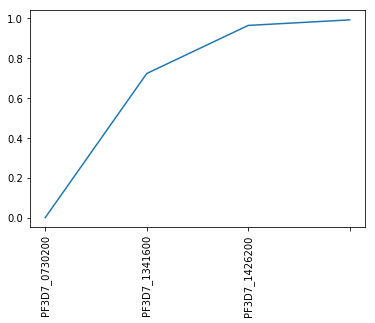

In [17]:
#N=100
x=np.arange(len(selected_scores))
y=selected_scores
plt.plot(x,y)
plt.xticks(x,selected_genes,rotation='vertical')
plt.show

### 2.3 Try the model with the three selected genes

In [18]:
selected_genes=['PF3D7_0730200','PF3D7_1341600','PF3D7_1426200']

In [19]:
def tryModel(genes,val_isolates,dfx,dfy):
    model_info={}
    
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=LinearRegression().fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    y_pred=model.predict(X_val)
    
    score=model.score(X_val,y_val)
    
    model_info['y']=y.values
    model_info['y_val']=y_val
    model_info['X']=X.values
    model_info['X_val']=X_val
    model_info['y_pred']=y_pred
    model_info['score']=score
    return model_info

In [20]:
#Try the model with the first selected gene
gene=['PF3D7_0730200']

In [21]:
try_model=tryModel(selected_genes,val_isolates,train,IC50)

In [22]:
y=[try_model['y_val'][i][0] for i in range(len(try_model['y_val']))]
y_pred=[try_model['y_pred'][i][0] for i in range(len(try_model['y_pred']))]

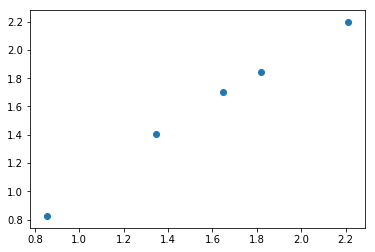

In [23]:
plt.scatter(y,y_pred)

### 2.4 Train the model with all the isolates and only the three selected genes

In [24]:
selected_genes

['PF3D7_0730200', 'PF3D7_1341600', 'PF3D7_1426200']

In [25]:
selected_train=train[getGenesColumnLabels(selected_genes)]
selected_train.head()

,PF3D7_0730200_24HR_DHA,PF3D7_0730200_24HR_UT,PF3D7_0730200_6HR_DHA,PF3D7_0730200_6HR_UT,PF3D7_0730200_24HR_6HR_DHA,PF3D7_0730200_24_6HR_UT,PF3D7_0730200_DHA_UT_6HR,PF3D7_0730200_DHA_UT_24HR,PF3D7_1341600_24HR_DHA,PF3D7_1341600_24HR_UT,...,PF3D7_1341600_DHA_UT_6HR,PF3D7_1341600_DHA_UT_24HR,PF3D7_1426200_24HR_DHA,PF3D7_1426200_24HR_UT,PF3D7_1426200_6HR_DHA,PF3D7_1426200_6HR_UT,PF3D7_1426200_24HR_6HR_DHA,PF3D7_1426200_24_6HR_UT,PF3D7_1426200_DHA_UT_6HR,PF3D7_1426200_DHA_UT_24HR
isolate_01,-0.037031,-0.073334,-0.530240,-0.245317,0.493209,0.171984,-0.284922,0.036303,0.188004,-0.787045,...,0.253384,0.975049,-0.128304,0.715598,0.011499,0.981056,-0.139804,-0.265458,-0.969557,-0.843902
isolate_02,-0.112674,-0.302915,-0.450089,-0.428044,0.337415,0.125129,-0.022045,0.190242,-0.517961,-0.480987,...,-0.250033,-0.036974,0.240229,0.013204,0.108668,0.220774,0.131561,-0.207570,-0.112106,0.227026
isolate_03,0.074458,-0.100457,0.117450,-0.109150,-0.042992,0.008693,0.226599,0.174914,-0.434341,0.022822,...,-0.940996,-0.457163,0.345671,-0.097277,0.413015,-0.258171,-0.067345,0.160894,0.671187,0.442948
isolate_04,-0.321503,-0.201828,-0.112915,-0.380831,-0.208588,0.179003,0.267916,-0.119675,-0.347945,-1.016586,...,0.370128,0.668641,0.017374,0.456434,-0.186565,-0.109549,0.203938,0.565983,-0.077016,-0.439060
isolate_05,-0.038549,-0.250931,-0.265711,-0.085343,0.227162,-0.165588,-0.180369,0.212381,-0.818626,-0.143570,...,0.805311,-0.675056,0.652695,-0.293320,0.351933,0.334961,0.300762,-0.628281,0.016973,0.946015


In [26]:
X=selected_train
y=IC50

model=LinearRegression().fit(X.values,y.values)

### 2.5 Save the model

In [27]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(model, '../models/model1_140719.pkl') 

['model1_140719.pkl']

## 3. Use the model1 on the test data

In [28]:
test.head()

,PF3D7_1340700_24HR_DHA,PF3D7_1340700_24HR_UT,PF3D7_1340700_6HR_DHA,PF3D7_1340700_6HR_UT,PF3D7_1246100_24HR_DHA,PF3D7_1246100_24HR_UT,PF3D7_1246100_6HR_DHA,PF3D7_1246100_6HR_UT,PF3D7_0106800_24HR_DHA,PF3D7_0106800_24HR_UT,...,PF3D7_0626800_DHA_UT_6HR,PF3D7_0626800_DHA_UT_24HR,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1457000_24_6HR_UT,PF3D7_1457000_DHA_UT_6HR,PF3D7_1457000_DHA_UT_24HR,PF3D7_1361800_24HR_6HR_DHA,PF3D7_1361800_24_6HR_UT,PF3D7_1361800_DHA_UT_6HR,PF3D7_1361800_DHA_UT_24HR
isolate_31,-0.083810,-0.237601,-0.393627,0.157657,1.241742,0.892842,0.944031,1.185809,-0.584764,-1.392044,...,-1.183098,0.495186,0.059165,-0.586973,-0.565675,0.080463,-0.555443,0.797244,0.992569,-0.360118
isolate_32,-0.100321,-0.315922,-0.205521,-0.549832,0.499754,1.074672,0.484960,1.243588,-0.369133,0.305464,...,0.529374,0.228348,-0.479942,-0.070097,0.490606,0.080761,0.248413,-1.265139,-1.552093,-0.038541
isolate_33,-0.306169,-0.196336,-0.129218,-0.254396,1.711083,0.716859,0.887892,1.320313,0.176647,-1.046201,...,0.592113,0.538705,0.148453,-0.215818,-0.019406,0.344865,-0.061137,-0.450015,-0.265031,0.123846
isolate_34,0.108025,-0.107807,-0.210586,-0.346967,0.856864,0.916836,0.771997,1.151976,0.257807,0.219475,...,-0.041319,0.201217,0.477662,-0.799427,-1.046440,0.230649,-0.277628,0.877974,1.153233,-0.002368
isolate_35,-0.383524,-0.542011,-0.383707,-0.488203,1.240874,0.366477,0.248377,0.872176,-0.288073,0.539267,...,1.450840,-0.549614,-0.840660,1.094264,1.443738,-0.491185,1.181817,-0.896510,-2.229431,-0.151104


### 3.1 Make the IC50 predictions

In [29]:
#Load the model
model_load = joblib.load('../models/model1_140719.pkl') 

In [30]:
selected_test=test[getGenesColumnLabels(selected_genes)]
selected_test.head()

,PF3D7_0730200_24HR_DHA,PF3D7_0730200_24HR_UT,PF3D7_0730200_6HR_DHA,PF3D7_0730200_6HR_UT,PF3D7_0730200_24HR_6HR_DHA,PF3D7_0730200_24_6HR_UT,PF3D7_0730200_DHA_UT_6HR,PF3D7_0730200_DHA_UT_24HR,PF3D7_1341600_24HR_DHA,PF3D7_1341600_24HR_UT,...,PF3D7_1341600_DHA_UT_6HR,PF3D7_1341600_DHA_UT_24HR,PF3D7_1426200_24HR_DHA,PF3D7_1426200_24HR_UT,PF3D7_1426200_6HR_DHA,PF3D7_1426200_6HR_UT,PF3D7_1426200_24HR_6HR_DHA,PF3D7_1426200_24_6HR_UT,PF3D7_1426200_DHA_UT_6HR,PF3D7_1426200_DHA_UT_24HR
isolate_31,-0.703596,-0.700134,-0.272551,-0.040702,-0.431046,-0.659432,-0.231848,-0.003463,-0.858399,-0.277527,...,0.178323,-0.580871,0.329245,0.178702,0.371113,0.707257,-0.041868,-0.528555,-0.336144,0.150544
isolate_32,-0.347220,-0.008325,-0.213340,-0.346004,-0.133880,0.337679,0.132664,-0.338894,-0.599167,-0.773197,...,-0.168488,0.174030,0.645354,0.735466,0.810575,0.376228,-0.165220,0.359238,0.434347,-0.090111
isolate_33,0.047989,-0.684308,-0.351197,-0.047073,0.399185,-0.637235,-0.304124,0.732297,-0.082528,-0.173893,...,0.422157,0.091365,0.018793,0.287341,0.440818,-0.049872,-0.422026,0.337213,0.490690,-0.268549
isolate_34,-0.664713,-0.401648,-0.273990,0.010716,-0.390724,-0.412364,-0.284705,-0.263065,-0.406698,-0.458120,...,0.479332,0.051422,0.170532,0.075933,0.375788,0.925295,-0.205256,-0.849361,-0.549507,0.094599
isolate_35,-0.312158,-0.053026,0.007652,-0.213307,-0.319810,0.160280,0.220958,-0.259132,-0.379456,-0.656161,...,-0.798243,0.276706,0.186138,0.498472,1.244600,-0.329952,-1.058462,0.828424,1.574552,-0.312334


In [31]:
X_test=selected_test
X_test.head()

,PF3D7_0730200_24HR_DHA,PF3D7_0730200_24HR_UT,PF3D7_0730200_6HR_DHA,PF3D7_0730200_6HR_UT,PF3D7_0730200_24HR_6HR_DHA,PF3D7_0730200_24_6HR_UT,PF3D7_0730200_DHA_UT_6HR,PF3D7_0730200_DHA_UT_24HR,PF3D7_1341600_24HR_DHA,PF3D7_1341600_24HR_UT,...,PF3D7_1341600_DHA_UT_6HR,PF3D7_1341600_DHA_UT_24HR,PF3D7_1426200_24HR_DHA,PF3D7_1426200_24HR_UT,PF3D7_1426200_6HR_DHA,PF3D7_1426200_6HR_UT,PF3D7_1426200_24HR_6HR_DHA,PF3D7_1426200_24_6HR_UT,PF3D7_1426200_DHA_UT_6HR,PF3D7_1426200_DHA_UT_24HR
isolate_31,-0.703596,-0.700134,-0.272551,-0.040702,-0.431046,-0.659432,-0.231848,-0.003463,-0.858399,-0.277527,...,0.178323,-0.580871,0.329245,0.178702,0.371113,0.707257,-0.041868,-0.528555,-0.336144,0.150544
isolate_32,-0.347220,-0.008325,-0.213340,-0.346004,-0.133880,0.337679,0.132664,-0.338894,-0.599167,-0.773197,...,-0.168488,0.174030,0.645354,0.735466,0.810575,0.376228,-0.165220,0.359238,0.434347,-0.090111
isolate_33,0.047989,-0.684308,-0.351197,-0.047073,0.399185,-0.637235,-0.304124,0.732297,-0.082528,-0.173893,...,0.422157,0.091365,0.018793,0.287341,0.440818,-0.049872,-0.422026,0.337213,0.490690,-0.268549
isolate_34,-0.664713,-0.401648,-0.273990,0.010716,-0.390724,-0.412364,-0.284705,-0.263065,-0.406698,-0.458120,...,0.479332,0.051422,0.170532,0.075933,0.375788,0.925295,-0.205256,-0.849361,-0.549507,0.094599
isolate_35,-0.312158,-0.053026,0.007652,-0.213307,-0.319810,0.160280,0.220958,-0.259132,-0.379456,-0.656161,...,-0.798243,0.276706,0.186138,0.498472,1.244600,-0.329952,-1.058462,0.828424,1.574552,-0.312334


In [32]:
IC50_pred=model_load.predict(X_test)

### 3.2 Format the predictions for submission

In [33]:
temp_list=[]
for value in IC50_pred:
    temp_list.append(value[0])
IC50_pred=temp_list

In [34]:
submission=pd.DataFrame({'Isolate':isolates_list_test,'Predicted_IC50':IC50_pred})

In [35]:
submission.head()

,Isolate,Predicted_IC50
0,isolate_31,[1.6437809715876175]
1,isolate_32,[1.2973943249476458]
2,isolate_33,[2.0784638284435824]
3,isolate_34,[1.460311533172019]
4,isolate_35,[0.5425151896322731]


### 3.3 Save submissions to file

In [36]:
#submission.to_csv('../submissions/lylat_SubCh1_model1_140719.txt', sep='\t',index=None)

## 4. Confirm that the deltas improve the score of the model

Run section 2.2 again but now each gene of the train set will have four columns ingoring the 4 columns correspondint to the differecial between the isolates sampling condition.

## 4.1 Modify getGenesColumns

In [37]:
genes_column_labels_df.loc[0:3]

,PF3D7_1340700,PF3D7_1246100,PF3D7_0106800,PF3D7_1431300,PF3D7_1426500,PF3D7_1216500,PF3D7_0418500,PF3D7_0821800,PF3D7_1432700,PF3D7_1463700,...,PF3D7_0417100,PF3D7_1332000,PF3D7_1204300,PF3D7_0729400,PF3D7_0820700,PF3D7_1320500,PF3D7_0109400,PF3D7_0626800,PF3D7_1457000,PF3D7_1361800
0,PF3D7_1340700_24HR_DHA,PF3D7_1246100_24HR_DHA,PF3D7_0106800_24HR_DHA,PF3D7_1431300_24HR_DHA,PF3D7_1426500_24HR_DHA,PF3D7_1216500_24HR_DHA,PF3D7_0418500_24HR_DHA,PF3D7_0821800_24HR_DHA,PF3D7_1432700_24HR_DHA,PF3D7_1463700_24HR_DHA,...,PF3D7_0417100_24HR_DHA,PF3D7_1332000_24HR_DHA,PF3D7_1204300_24HR_DHA,PF3D7_0729400_24HR_DHA,PF3D7_0820700_24HR_DHA,PF3D7_1320500_24HR_DHA,PF3D7_0109400_24HR_DHA,PF3D7_0626800_24HR_DHA,PF3D7_1457000_24HR_DHA,PF3D7_1361800_24HR_DHA
1,PF3D7_1340700_24HR_UT,PF3D7_1246100_24HR_UT,PF3D7_0106800_24HR_UT,PF3D7_1431300_24HR_UT,PF3D7_1426500_24HR_UT,PF3D7_1216500_24HR_UT,PF3D7_0418500_24HR_UT,PF3D7_0821800_24HR_UT,PF3D7_1432700_24HR_UT,PF3D7_1463700_24HR_UT,...,PF3D7_0417100_24HR_UT,PF3D7_1332000_24HR_UT,PF3D7_1204300_24HR_UT,PF3D7_0729400_24HR_UT,PF3D7_0820700_24HR_UT,PF3D7_1320500_24HR_UT,PF3D7_0109400_24HR_UT,PF3D7_0626800_24HR_UT,PF3D7_1457000_24HR_UT,PF3D7_1361800_24HR_UT
2,PF3D7_1340700_6HR_DHA,PF3D7_1246100_6HR_DHA,PF3D7_0106800_6HR_DHA,PF3D7_1431300_6HR_DHA,PF3D7_1426500_6HR_DHA,PF3D7_1216500_6HR_DHA,PF3D7_0418500_6HR_DHA,PF3D7_0821800_6HR_DHA,PF3D7_1432700_6HR_DHA,PF3D7_1463700_6HR_DHA,...,PF3D7_0417100_6HR_DHA,PF3D7_1332000_6HR_DHA,PF3D7_1204300_6HR_DHA,PF3D7_0729400_6HR_DHA,PF3D7_0820700_6HR_DHA,PF3D7_1320500_6HR_DHA,PF3D7_0109400_6HR_DHA,PF3D7_0626800_6HR_DHA,PF3D7_1457000_6HR_DHA,PF3D7_1361800_6HR_DHA
3,PF3D7_1340700_6HR_UT,PF3D7_1246100_6HR_UT,PF3D7_0106800_6HR_UT,PF3D7_1431300_6HR_UT,PF3D7_1426500_6HR_UT,PF3D7_1216500_6HR_UT,PF3D7_0418500_6HR_UT,PF3D7_0821800_6HR_UT,PF3D7_1432700_6HR_UT,PF3D7_1463700_6HR_UT,...,PF3D7_0417100_6HR_UT,PF3D7_1332000_6HR_UT,PF3D7_1204300_6HR_UT,PF3D7_0729400_6HR_UT,PF3D7_0820700_6HR_UT,PF3D7_1320500_6HR_UT,PF3D7_0109400_6HR_UT,PF3D7_0626800_6HR_UT,PF3D7_1457000_6HR_UT,PF3D7_1361800_6HR_UT


In [38]:
def getGenesColumnLabels2(genes):
    genes_list=[]
    for gene in genes:
        genes_list=genes_list+list(genes_column_labels_df[gene][0:4])
    return genes_list

In [39]:
def filterDfByGenes2(genes,df):
    #genes is a list of genes: e.g.['PF3D7_1360200','PF3D7_1212800']
    genes_to_filter=getGenesColumnLabels2(genes)
    filtered_df=df[genes_to_filter]
    return filtered_df

In [40]:
def trainModel(genes,val_isolates,dfx,dfy):
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes2(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=LinearRegression().fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes2(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    score=model.score(X_val,y_val)
    
    return score

In [41]:
selected_genes=[]
selected_scores=[0]
N=10
for i in range(N):
    best_gene_so_far=''
    best_score_so_far=selected_scores[-1]
    
    for gene in genes_list:
        
        if gene not in selected_genes:
            genes_to_use=selected_genes+[gene]
            
            model_score=trainModel(genes_to_use,val_isolates,train,IC50)
            
            if model_score > best_score_so_far:
                best_score_so_far=model_score
                best_gene_so_far=gene

    
    if best_score_so_far>selected_scores[-1]:
        selected_genes.append(best_gene_so_far)
        selected_scores.append(best_score_so_far)

([<matplotlib.axis.XTick at 0x186bd3800b8>,
 <a list of 3 Text xticklabel objects>)

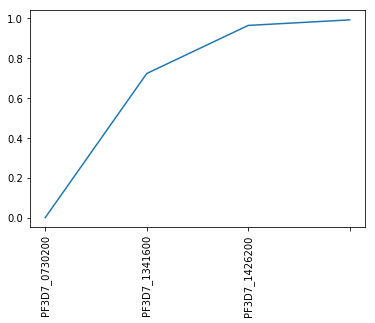

In [42]:
#N=100
x=np.arange(len(selected_scores))
y=selected_scores
plt.plot(x,y)
plt.xticks(x,selected_genes,rotation='vertical')


In [43]:
selected_scores

[0, 0.7232934274782725, 0.9647245375940361, 0.9926399964586666]

Conclussion: The differential don't improve the model

### 5. Validate the model

Train the same model choosing different validation sets each time

In [97]:
new_val_isolates=[]
val_isolate_list=[]
val_score_list=[]
val_genes_list=[]

M=100

for i in range(M):
    new_val_isolates=random.sample(isolates_list,5)
    
    #Train model to find the best combination of genes for the new_val_isolates
    selected_genes=[]
    selected_scores=[0]
    N=10
    
    for i in range(N):
        best_gene_so_far=''
        best_score_so_far=selected_scores[-1]

        for gene in genes_list:

            if gene not in selected_genes:
                genes_to_use=selected_genes+[gene]

                model_score=trainModel(genes_to_use,new_val_isolates,train,IC50)

                if model_score > best_score_so_far:
                    best_score_so_far=model_score
                    best_gene_so_far=gene


        if best_score_so_far>selected_scores[-1]:
            selected_genes.append(best_gene_so_far)
            selected_scores.append(best_score_so_far)
    
    val_isolate_list.append(new_val_isolates)
    val_score_list.append(selected_scores)
    val_genes_list.append(selected_genes)
    
    
    

In [98]:
val_genes_list

[['PF3D7_1146900', 'PF3D7_1238800', 'PF3D7_1466400'],
 ['PF3D7_1120100', 'PF3D7_0211400', 'PF3D7_1466700'],
 ['PF3D7_1233000', 'PF3D7_0321200', 'PF3D7_0210000'],
 ['PF3D7_1116600', 'PF3D7_1235400', 'PF3D7_1347200'],
 ['PF3D7_1125400',
  'PF3D7_1116600',
  'PF3D7_0618900',
  'PF3D7_1338200',
  'PF3D7_1128700'],
 ['PF3D7_0110100', 'PF3D7_1342800', 'PF3D7_1242800'],
 ['PF3D7_1244800', 'PF3D7_1314600'],
 ['PF3D7_1306400', 'PF3D7_0630500', 'PF3D7_1215300'],
 ['PF3D7_0104200', 'PF3D7_1137800', 'PF3D7_1116400'],
 ['PF3D7_1120100', 'PF3D7_1469000', 'PF3D7_1361400'],
 ['PF3D7_1250600', 'PF3D7_1313000', 'PF3D7_1431300'],
 ['PF3D7_1423000', 'PF3D7_1463500', 'PF3D7_1122100'],
 ['PF3D7_0826700', 'PF3D7_1233000', 'PF3D7_0905900', 'PF3D7_0317800'],
 ['PF3D7_0910600', 'PF3D7_1312400', 'PF3D7_0932200', 'PF3D7_1365400'],
 ['PF3D7_1253400', 'PF3D7_0110100', 'PF3D7_1342500', 'PF3D7_1245100'],
 ['PF3D7_0910600', 'PF3D7_0602400', 'PF3D7_0210000'],
 ['PF3D7_1120100', 'PF3D7_1223900', 'PF3D7_1426300', 'PF3D7_

In [99]:
val_isolate_list

[['isolate_15', 'isolate_01', 'isolate_23', 'isolate_06', 'isolate_22'],
 ['isolate_26', 'isolate_13', 'isolate_28', 'isolate_22', 'isolate_15'],
 ['isolate_15', 'isolate_29', 'isolate_13', 'isolate_30', 'isolate_19'],
 ['isolate_14', 'isolate_22', 'isolate_24', 'isolate_01', 'isolate_02'],
 ['isolate_21', 'isolate_17', 'isolate_06', 'isolate_16', 'isolate_08'],
 ['isolate_11', 'isolate_26', 'isolate_01', 'isolate_06', 'isolate_12'],
 ['isolate_10', 'isolate_11', 'isolate_22', 'isolate_02', 'isolate_13'],
 ['isolate_11', 'isolate_20', 'isolate_27', 'isolate_29', 'isolate_03'],
 ['isolate_04', 'isolate_25', 'isolate_21', 'isolate_03', 'isolate_20'],
 ['isolate_29', 'isolate_15', 'isolate_19', 'isolate_14', 'isolate_03'],
 ['isolate_21', 'isolate_25', 'isolate_26', 'isolate_10', 'isolate_24'],
 ['isolate_13', 'isolate_05', 'isolate_15', 'isolate_18', 'isolate_21'],
 ['isolate_25', 'isolate_19', 'isolate_27', 'isolate_23', 'isolate_11'],
 ['isolate_04', 'isolate_24', 'isolate_29', 'isolat

In [100]:
val_score_list

[[0, 0.5195809416289303, 0.9281491820161777, 0.9793301860619373],
 [0, 0.4483364826074798, 0.9832159487710083, 0.9870875241147318],
 [0, 0.6951994862645282, 0.9752734137957766, 0.9841568498471672],
 [0, 0.6360934445237498, 0.937008514885735, 0.9476953639581859],
 [0,
  0.2453629210613023,
  0.6041600210315757,
  0.7934385773565162,
  0.9563291568400897,
  0.9859842661399524],
 [0, 0.8823818126175157, 0.9362931525276543, 0.9565054133942235],
 [0, 0.6868841438579272, 0.7909778617326363],
 [0, 0.5483821627254787, 0.9048602586655828, 0.9475032335027815],
 [0, 0.4444546450869403, 0.8695181147391521, 0.9870914246409505],
 [0, 0.6291234748421055, 0.9470738718531436, 0.9910007023233705],
 [0, 0.5481295238917404, 0.9431592801143093, 0.9864979718035864],
 [0, 0.6960079402005919, 0.9550323315115614, 0.964064848859248],
 [0,
  0.6958419297886438,
  0.8949418241536097,
  0.9596341699289495,
  0.9713137338546476],
 [0,
  0.4882857024351246,
  0.8283404740452238,
  0.9909998645578842,
  0.99471081565

### 6. Train model using LASSO

In [106]:
from sklearn import linear_model

In [101]:
#Global variables
#val_isolates
#genes_dict
val_isolates=['isolate_07','isolate_11','isolate_16','isolate_18','isolate_27']

### 6.1 Define the new train function

In [107]:
def trainModelLASSO(genes,val_isolates,dfx,dfy):
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=linear_model.Lasso(alpha=0.1).fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    score=model.score(X_val,y_val)
    
    return score

### 6.2 Train the model using linear regression

In [117]:
selected_genes=[]
selected_scores=[0]
N=20
for i in range(N):
    best_gene_so_far=''
    best_score_so_far=selected_scores[-1]
    
    for gene in genes_list:
        
        if gene not in selected_genes:
            genes_to_use=selected_genes+[gene]
            
            model_score=trainModelLASSO(genes_to_use,val_isolates,train,IC50)
            
            if model_score > best_score_so_far:
                best_score_so_far=model_score
                best_gene_so_far=gene

    
    if best_score_so_far>selected_scores[-1]:
        selected_genes.append(best_gene_so_far)
        selected_scores.append(best_score_so_far)

In [114]:
selected_scores

[0,
 0.2530370211698727,
 0.4599599236123799,
 0.5826717331695985,
 0.6559621390951622,
 0.6937164634972335,
 0.6982359507405541,
 0.6982487787599694,
 0.6982492605426571]

In [118]:
selected_genes

['PF3D7_1418100',
 'PF3D7_0223100',
 'PF3D7_0731500',
 'PF3D7_0801300',
 'PF3D7_1223900',
 'PF3D7_1335900',
 'PF3D7_1428300',
 'PF3D7_0602400']

<function matplotlib.pyplot.show(*args, **kw)>

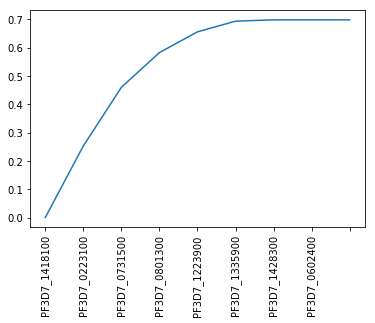

In [119]:
#N=100
x=np.arange(len(selected_scores))
y=selected_scores
plt.plot(x,y)
plt.xticks(x,selected_genes,rotation='vertical')
plt.show

###  6.3 Try the model with the new selected genes

In [124]:
def tryModelLASSO(genes,val_isolates,dfx,dfy):
    model_info={}
    
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=linear_model.Lasso(alpha=0.1).fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    y_pred=model.predict(X_val)
    
    score=model.score(X_val,y_val)
    
    model_info['y']=y.values
    model_info['y_val']=y_val
    model_info['X']=X.values
    model_info['X_val']=X_val
    model_info['y_pred']=y_pred
    model_info['score']=score
    return model_info

In [20]:
#Try the model with the first selected gene
gene=['PF3D7_0730200']

In [125]:
try_model=tryModelLASSO(selected_genes,val_isolates,train,IC50)

In [126]:
try_model['y_val']

array([[0.8567],
       [1.82  ],
       [2.21  ],
       [1.647 ],
       [1.348 ]])

In [127]:
try_model['y_pred']

array([1.16248361, 1.6723602 , 1.80485489, 1.69374343, 1.52394784])

In [128]:
y=[try_model['y_val'][i][0] for i in range(len(try_model['y_val']))]
y_pred=try_model['y_pred']

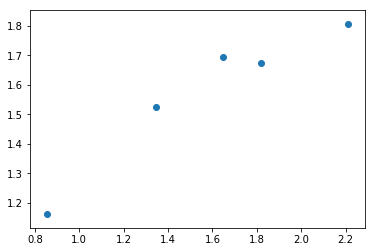

In [129]:
plt.scatter(y,y_pred)

### 7. Train model using linear regression and all the genes without the diferentials

In [130]:
val_isolates

['isolate_07', 'isolate_11', 'isolate_16', 'isolate_18', 'isolate_27']

In [131]:
genes_list

['PF3D7_1340700',
 'PF3D7_1246100',
 'PF3D7_0106800',
 'PF3D7_1431300',
 'PF3D7_1426500',
 'PF3D7_1216500',
 'PF3D7_0418500',
 'PF3D7_0821800',
 'PF3D7_1432700',
 'PF3D7_1463700',
 'PF3D7_1329100',
 'PF3D7_1032500',
 'PF3D7_0319600',
 'PF3D7_0503100',
 'PF3D7_0813800',
 'PF3D7_0415400',
 'PF3D7_1423000',
 'PF3D7_1223900',
 'PF3D7_0321200',
 'PF3D7_1220900',
 'PF3D7_1034400',
 'PF3D7_0211400',
 'PF3D7_0708500',
 'PF3D7_1211000',
 'PF3D7_1418100',
 'PF3D7_1437700',
 'PF3D7_0729900',
 'PF3D7_1426300',
 'PF3D7_1134000',
 'PF3D7_0807300',
 'PF3D7_1302200',
 'PF3D7_0805200',
 'PF3D7_0816000',
 'PF3D7_0909200',
 'PF3D7_1251200',
 'PF3D7_0826100',
 'PF3D7_1446600',
 'PF3D7_0820200',
 'PF3D7_1144900',
 'PF3D7_0826700',
 'PF3D7_0711000',
 'PF3D7_1209900',
 'PF3D7_0206200',
 'PF3D7_1246200',
 'PF3D7_1119500',
 'PF3D7_1121700',
 'PF3D7_0211600',
 'PF3D7_1141600',
 'PF3D7_1360500',
 'PF3D7_1008400',
 'PF3D7_1471100',
 'PF3D7_1311400',
 'PF3D7_1250100',
 'PF3D7_1245100',
 'PF3D7_0209000',
 'PF3D7_06

In [132]:
X=train
y=IC50

model=LinearRegression().fit(X.values,y.values)

In [133]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(model, 'model2_220719.pkl') 

['model2_220719.pkl']

### 7.1 Use the model2 on the test data

In [134]:
test.head()

,PF3D7_1340700_24HR_DHA,PF3D7_1340700_24HR_UT,PF3D7_1340700_6HR_DHA,PF3D7_1340700_6HR_UT,PF3D7_1246100_24HR_DHA,PF3D7_1246100_24HR_UT,PF3D7_1246100_6HR_DHA,PF3D7_1246100_6HR_UT,PF3D7_0106800_24HR_DHA,PF3D7_0106800_24HR_UT,...,PF3D7_0626800_DHA_UT_6HR,PF3D7_0626800_DHA_UT_24HR,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1457000_24_6HR_UT,PF3D7_1457000_DHA_UT_6HR,PF3D7_1457000_DHA_UT_24HR,PF3D7_1361800_24HR_6HR_DHA,PF3D7_1361800_24_6HR_UT,PF3D7_1361800_DHA_UT_6HR,PF3D7_1361800_DHA_UT_24HR
isolate_31,-0.083810,-0.237601,-0.393627,0.157657,1.241742,0.892842,0.944031,1.185809,-0.584764,-1.392044,...,-1.183098,0.495186,0.059165,-0.586973,-0.565675,0.080463,-0.555443,0.797244,0.992569,-0.360118
isolate_32,-0.100321,-0.315922,-0.205521,-0.549832,0.499754,1.074672,0.484960,1.243588,-0.369133,0.305464,...,0.529374,0.228348,-0.479942,-0.070097,0.490606,0.080761,0.248413,-1.265139,-1.552093,-0.038541
isolate_33,-0.306169,-0.196336,-0.129218,-0.254396,1.711083,0.716859,0.887892,1.320313,0.176647,-1.046201,...,0.592113,0.538705,0.148453,-0.215818,-0.019406,0.344865,-0.061137,-0.450015,-0.265031,0.123846
isolate_34,0.108025,-0.107807,-0.210586,-0.346967,0.856864,0.916836,0.771997,1.151976,0.257807,0.219475,...,-0.041319,0.201217,0.477662,-0.799427,-1.046440,0.230649,-0.277628,0.877974,1.153233,-0.002368
isolate_35,-0.383524,-0.542011,-0.383707,-0.488203,1.240874,0.366477,0.248377,0.872176,-0.288073,0.539267,...,1.450840,-0.549614,-0.840660,1.094264,1.443738,-0.491185,1.181817,-0.896510,-2.229431,-0.151104


### 7.2 Make the IC50 predictions

In [135]:
#Load the model
model_load = joblib.load('../models/model2_220719.pkl') 

In [136]:
X_test=test
X_test.head()

,PF3D7_1340700_24HR_DHA,PF3D7_1340700_24HR_UT,PF3D7_1340700_6HR_DHA,PF3D7_1340700_6HR_UT,PF3D7_1246100_24HR_DHA,PF3D7_1246100_24HR_UT,PF3D7_1246100_6HR_DHA,PF3D7_1246100_6HR_UT,PF3D7_0106800_24HR_DHA,PF3D7_0106800_24HR_UT,...,PF3D7_0626800_DHA_UT_6HR,PF3D7_0626800_DHA_UT_24HR,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1457000_24_6HR_UT,PF3D7_1457000_DHA_UT_6HR,PF3D7_1457000_DHA_UT_24HR,PF3D7_1361800_24HR_6HR_DHA,PF3D7_1361800_24_6HR_UT,PF3D7_1361800_DHA_UT_6HR,PF3D7_1361800_DHA_UT_24HR
isolate_31,-0.083810,-0.237601,-0.393627,0.157657,1.241742,0.892842,0.944031,1.185809,-0.584764,-1.392044,...,-1.183098,0.495186,0.059165,-0.586973,-0.565675,0.080463,-0.555443,0.797244,0.992569,-0.360118
isolate_32,-0.100321,-0.315922,-0.205521,-0.549832,0.499754,1.074672,0.484960,1.243588,-0.369133,0.305464,...,0.529374,0.228348,-0.479942,-0.070097,0.490606,0.080761,0.248413,-1.265139,-1.552093,-0.038541
isolate_33,-0.306169,-0.196336,-0.129218,-0.254396,1.711083,0.716859,0.887892,1.320313,0.176647,-1.046201,...,0.592113,0.538705,0.148453,-0.215818,-0.019406,0.344865,-0.061137,-0.450015,-0.265031,0.123846
isolate_34,0.108025,-0.107807,-0.210586,-0.346967,0.856864,0.916836,0.771997,1.151976,0.257807,0.219475,...,-0.041319,0.201217,0.477662,-0.799427,-1.046440,0.230649,-0.277628,0.877974,1.153233,-0.002368
isolate_35,-0.383524,-0.542011,-0.383707,-0.488203,1.240874,0.366477,0.248377,0.872176,-0.288073,0.539267,...,1.450840,-0.549614,-0.840660,1.094264,1.443738,-0.491185,1.181817,-0.896510,-2.229431,-0.151104


In [150]:
IC50_pred=model_load.predict(X_test)

### 7.3 Format the predictions for submission

In [154]:
temp_list=[]
for value in IC50_pred:
    temp_list.append(value[0])
IC50_pred=temp_list

In [155]:
submission=pd.DataFrame({'Isolate':isolates_list_test,'Predicted_IC50':IC50_pred})

In [156]:
submission.head()

,Isolate,Predicted_IC50
0,isolate_31,1.963126
1,isolate_32,1.476340
2,isolate_33,1.001944
3,isolate_34,2.349245
4,isolate_35,0.566230


### 3.3 Save submissions to file

In [157]:
submission.to_csv('../submissions/lylat_SubCh1_model2_220719.txt', sep='\t',index=None)

# 8. Train models using LARS

Train the data that has all the genes as pre-prossed in section 5.1 for the **data_explore** notebook

In [50]:
Alltrain=pd.read_csv('../data/flat_Alltrain.csv', index_col=0 )
Alltest=pd.read_csv('../data/flat_Alltest.csv', index_col=0 )
IC50=pd.read_csv('../data/flat_IC50.csv',index_col=0)

In [4]:
reg = linear_model.Lars(n_nonzero_coefs=1)

In [51]:
X=Alltrain.values
y=[v[0] for v in IC50.values]

In [6]:
reg.fit(X,y)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=1, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [11]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(reg, '../models/model3_140819.pkl') 

['../models/model3_140819.pkl']

### 8.1 Use the model3 on the test data

Use Test data that has all the genes as pre-prossed in section 5.2 for the **data_explore** notebook

In [9]:
Alltest.head()

,MAL1.465720.465873.bc..rv.._24HR_DHA,MAL1.465720.465873.bc..rv.._24HR_UT,MAL1.465720.465873.bc..rv.._6HR_DHA,MAL1.465720.465873.bc..rv.._6HR_UT,MAL1.48287.48430....kr...can_24HR_DHA,MAL1.48287.48430....kr...can_24HR_UT,MAL1.48287.48430....kr...can_6HR_DHA,MAL1.48287.48430....kr...can_6HR_UT,MAL1.562126.562246.bc..r..._24HR_DHA,MAL1.562126.562246.bc..r..._24HR_UT,...,PF3D7_1479900_6HR_DHA,PF3D7_1479900_6HR_UT,PF3D7_1480000_24HR_DHA,PF3D7_1480000_24HR_UT,PF3D7_1480000_6HR_DHA,PF3D7_1480000_6HR_UT,PF3D7_1480100_24HR_DHA,PF3D7_1480100_24HR_UT,PF3D7_1480100_6HR_DHA,PF3D7_1480100_6HR_UT
isolate_31,0.331889,0.384609,0.127538,0.770151,-2.240666,-1.148180,-1.429485,-1.250674,-1.374813,-0.415748,...,-1.587528,-1.321217,-4.372933,-5.052881,-4.948757,-4.029268,-1.714546,-1.106747,-1.524659,-2.091407
isolate_32,0.292870,0.212604,0.488279,-0.270898,-1.708955,-1.877999,-1.579333,-0.894499,-1.075350,-1.759377,...,-1.536142,-1.653011,-4.991477,-4.190220,-4.295806,-4.647708,-2.409299,-2.240881,-2.134556,-0.594054
isolate_33,0.302845,-0.373568,-0.022357,0.356370,-1.573917,-1.747897,-1.292145,-1.916230,-1.283210,-0.042734,...,-2.008126,-1.283603,-4.789230,-4.215403,-4.265268,-3.698062,-2.349921,-0.950303,-1.778473,-0.490212
isolate_34,0.138070,0.352066,-0.304539,0.411080,-2.104094,-1.905021,-1.757525,-1.927857,-1.267395,-1.527366,...,-1.289212,-2.489302,-3.553589,-3.480636,-5.401736,-4.154778,-1.451041,-1.425710,-0.562436,-1.825506
isolate_35,0.317207,0.379982,0.612449,-0.338538,-1.397006,-1.509501,-2.228005,-1.759452,-1.095190,-1.678029,...,-2.643800,-1.427714,-3.432687,-5.218094,-4.269741,-4.324910,-1.446432,-2.176601,-2.230341,-2.021473


### 8.2 Make the IC50 predictions

In [12]:
#Load the model
model_load = joblib.load('../models/model3_140819.pkl') 

In [13]:
X_test=Alltest.values

In [14]:
IC50_pred=model_load.predict(X_test)

In [15]:
IC50

,DHA_IC50
isolate_01,2.1770
isolate_02,1.6970
isolate_03,1.7990
isolate_04,0.7100
isolate_05,2.0250
isolate_06,1.3670
isolate_07,0.8567
isolate_08,3.4600
isolate_09,1.7650
isolate_10,1.7540


In [16]:
IC50_pred

array([1.58317504, 1.5841044 , 1.593098  , 1.59373276, 1.57822571,
       1.59130793, 1.58787105, 1.57895285, 1.57903926, 1.58676688,
       1.58695743, 1.58891316, 1.59393108, 1.58533034, 1.59227686,
       1.59133918, 1.58907755, 1.58614805, 1.58598201, 1.58821712,
       1.58638861, 1.58698062, 1.59469182, 1.59610786, 1.59349301])

### 8.3 Perform crossvalidation

Perform crossvalidation on 

In [17]:
from sklearn.model_selection import cross_validate

In [55]:
reg = linear_model.Lars(n_nonzero_coefs=5)
scores = cross_validate(reg, X,y, scoring='r2', cv=5)

In [26]:
#With n_nonzero_coefs=1
scores['test_score']

array([-0.10452661, -0.2185645 , -0.24557277, -0.15977527, -0.76671702])

In [53]:
#With n_nonzero_coefs=3
scores['test_score']

array([-0.15619116, -0.30780706, -0.52564096, -0.88299754, -1.10023416])

In [56]:
#With n_nonzero_coefs=5
scores['test_score']

array([-0.65872339, -0.41638489, -0.73222664, -1.21044662, -1.21189663])

In [27]:
#With n_nonzero_coefs=1
scores['train_score']

array([0.13598446, 0.06139339, 0.12145691, 0.00727816, 0.05903198])

In [54]:
#With n_nonzero_coefs=3
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.17890556, 0.23405822, 0.31614439, 0.2902435 , 0.37232455])

In [57]:
#With n_nonzero_coefs=5
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.44485788, 0.41698166, 0.42769307, 0.45683046, 0.49323345])

# 9. Train models using LARS after PCA

Train the data that has all the genes as and whose features have been reduced using PCA as pre-prossed in section 6.3 in the **data_explore** notebook

In [58]:
train_PCA_30=pd.read_csv('../data/Alltrain_PCA_30.csv', index_col=0 )
test_PCA_30=pd.read_csv('../data/Alltest_PCA_30.csv', index_col=0 )
IC50=pd.read_csv('../data/flat_IC50.csv',index_col=0)

In [59]:
X=train_PCA_30.values
X_test=test_PCA_30
y=IC50.values

### 9.1 Perform crossvalidation

Perform crossvalidation on 

In [69]:
reg = linear_model.Lars(n_nonzero_coefs=15)
scores = cross_validate(reg, X,y, scoring='r2', cv=5)

In [45]:
#n_nonzero_coefs=1
scores['test_score']

array([-0.13275322, -0.14981445, -0.14457485, -0.19670003, -0.95705979])

In [46]:
#n_nonzero_coefs=1
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.08596497, 0.10205859, 0.10587242, 0.02399014, 0.04038882])

In [61]:
#n_nonzero_coefs=3
scores['test_score']

array([-0.2158115 , -0.16124901, -0.15249657, -0.24462078, -1.16917157])

In [62]:
#n_nonzero_coefs=3
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.16735838, 0.1688365 , 0.18346953, 0.06572774, 0.24292484])

In [64]:
#n_nonzero_coefs=5
scores['test_score']

array([-0.23625418, -0.17317658, -0.13343252, -0.22141656, -1.21879144])

In [65]:
#n_nonzero_coefs=5
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.32918391, 0.34087138, 0.24922036, 0.17871189, 0.35277601])

In [71]:
#n_nonzero_coefs=15
scores['test_score']

array([-0.70725393, -0.06823268, -0.12260743, -0.17090597, -2.95188817])

In [70]:
#n_nonzero_coefs=15
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.63943515, 0.8640944 , 0.68634766, 0.74294694, 0.83266432])

Conclussion: This model doesn't perfom well because all training scores are below 0.1 and the test scores are about -0.15 with the exception of one that is very good (-0.95). However, to say that it is a good model all test scores must be similar and high. Try this approach again but only using the flat_train data.

#  10. Train model using LARS after PCA on important genes

Use train and test data that only contain the important genes as found from steps 2 - 4 in the data_explore notebook.

In [5]:
train_PCA_30=pd.read_csv('../data/train_PCA_30.csv', index_col=0)
test_PCA_30=pd.read_csv('../data/test_PCA_30.csv', index_col=0)
IC50=pd.read_csv('../data/flat_IC50.csv',index_col=0)

In [6]:
X=train_PCA_30.values
X_test=test_PCA_30.values
y=IC50.values

### 10.1 Perform crossvalidation

Perform crossvalidation on 

In [75]:
from sklearn import linear_model
from sklearn.model_selection import cross_validate
reg = linear_model.Lars(n_nonzero_coefs=5)
scores = cross_validate(reg, X,y, scoring='r2', cv=5)

In [11]:
#n_nonzero_coefs=1
scores['test_score']

array([ 0.3240026 , -0.11179271, -0.06435403,  0.22474563, -0.65544427])

In [12]:
#n_nonzero_coefs=1
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.22316528, 0.06273363, 0.25301592, 0.15409133, 0.43105509])

In [73]:
#n_nonzero_coefs=3
scores['test_score']

array([-0.2158115 , -0.16124901, -0.15249657, -0.24462078, -1.16917157])

In [74]:
#n_nonzero_coefs=3
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.16735838, 0.1688365 , 0.18346953, 0.06572774, 0.24292484])

In [76]:
#n_nonzero_coefs=5
scores['test_score']

array([-0.23625418, -0.17317658, -0.13343252, -0.22141656, -1.21879144])

In [77]:
#n_nonzero_coefs=5
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.32918391, 0.34087138, 0.24922036, 0.17871189, 0.35277601])

## 11. Follow steps from section 2 but using LARS
Hacer modelo lineal de manera incremental (un gen con sus 8 valores a la vez)

### Isolates for validation
* isolate_07
* isolate_27
* isolate_18
* isolate_11
* isolate_16



In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 11.1 Create the functions

Functions are created in step 2.1 of the present notebook

In [78]:
#Global variables
#val_isolates
#genes_dict
val_isolates=['isolate_07','isolate_11','isolate_16','isolate_18','isolate_27']

In [79]:
def trainModelLARS(genes,val_isolates,dfx,dfy):
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=linear_model.Lars(n_nonzero_coefs=5)
    model=model.fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    score=model.score(X_val,y_val)
    
    return score

### 11.2 Train the model using LARS

In [80]:
from sklearn import linear_model

In [81]:
selected_genes=[]
selected_scores=[0]
N=100
for i in range(N):
    best_gene_so_far=''
    best_score_so_far=selected_scores[-1]
    
    for gene in genes_list:
        
        if gene not in selected_genes:
            genes_to_use=selected_genes+[gene]
            
            model_score=trainModelLARS(genes_to_use,val_isolates,train,IC50)
            
            if model_score > best_score_so_far:
                best_score_so_far=model_score
                best_gene_so_far=gene

    
    if best_score_so_far>selected_scores[-1]:
        selected_genes.append(best_gene_so_far)
        selected_scores.append(best_score_so_far)

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.656e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Public\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=3.778e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 3.942e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Public\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.388e-03, with an active set of 3 regressors, and the smallest cholesky

In [82]:
selected_scores

[0,
 0.7232934274782723,
 0.8965236406729211,
 0.9356480202389428,
 0.9612603758151324]

<function matplotlib.pyplot.show(*args, **kw)>

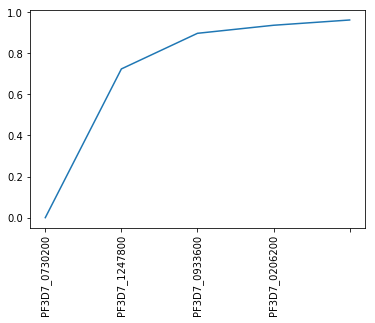

In [83]:
#N=100
x=np.arange(len(selected_scores))
y=selected_scores
plt.plot(x,y)
plt.xticks(x,selected_genes,rotation='vertical')
plt.show

### 11.3 Try the model with the three selected genes

In [84]:
selected_genes=['PF3D7_0730200','PF3D7_1247800','PF3D7_0933600','PF3D7_0206200']

In [85]:
def tryModel(genes,val_isolates,dfx,dfy):
    model_info={}
    
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=linear_model.Lars(n_nonzero_coefs=1)
    model=model.fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    y_pred=model.predict(X_val)
    
    score=model.score(X_val,y_val)
    
    model_info['y']=y.values
    model_info['y_val']=y_val
    model_info['X']=X.values
    model_info['X_val']=X_val
    model_info['y_pred']=y_pred
    model_info['score']=score
    return model_info

In [32]:
#Try the model with the first selected gene
gene=['PF3D7_0729900']

In [86]:
try_model=tryModel(selected_genes,val_isolates,train,IC50)

In [87]:
y=[try_model['y_val'][i][0] for i in range(len(try_model['y_val']))]
y_pred=try_model['y_pred']

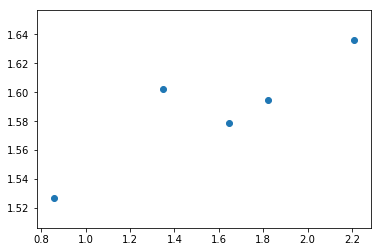

In [88]:
plt.scatter(y,y_pred)

This model looks good, but we have to evaluate that there is no overfitting. 

### 11.4 Train the model with all the isolates and only the three selected genes

In [24]:
selected_genes

['PF3D7_0730200', 'PF3D7_1341600', 'PF3D7_1426200']

In [91]:
selected_train=train[getGenesColumnLabels(selected_genes)]
selected_train.head()

,PF3D7_0730200_24HR_DHA,PF3D7_0730200_24HR_UT,PF3D7_0730200_6HR_DHA,PF3D7_0730200_6HR_UT,PF3D7_0730200_24HR_6HR_DHA,PF3D7_0730200_24_6HR_UT,PF3D7_0730200_DHA_UT_6HR,PF3D7_0730200_DHA_UT_24HR,PF3D7_1247800_24HR_DHA,PF3D7_1247800_24HR_UT,...,PF3D7_0933600_DHA_UT_6HR,PF3D7_0933600_DHA_UT_24HR,PF3D7_0206200_24HR_DHA,PF3D7_0206200_24HR_UT,PF3D7_0206200_6HR_DHA,PF3D7_0206200_6HR_UT,PF3D7_0206200_24HR_6HR_DHA,PF3D7_0206200_24_6HR_UT,PF3D7_0206200_DHA_UT_6HR,PF3D7_0206200_DHA_UT_24HR
isolate_01,-0.037031,-0.073334,-0.530240,-0.245317,0.493209,0.171984,-0.284922,0.036303,0.573906,0.221630,...,-0.103493,-0.106016,0.275914,-0.034525,-0.066056,0.137937,0.341970,-0.172462,-0.203993,0.310439
isolate_02,-0.112674,-0.302915,-0.450089,-0.428044,0.337415,0.125129,-0.022045,0.190242,0.479295,0.677604,...,-0.200230,-0.426086,0.011931,0.416156,0.585833,0.159367,-0.573902,0.256789,0.426466,-0.404225
isolate_03,0.074458,-0.100457,0.117450,-0.109150,-0.042992,0.008693,0.226599,0.174914,0.093206,0.466280,...,-0.747914,-0.487701,-0.291227,0.182642,0.141649,0.268595,-0.432876,-0.085954,-0.126947,-0.473869
isolate_04,-0.321503,-0.201828,-0.112915,-0.380831,-0.208588,0.179003,0.267916,-0.119675,0.542648,0.523919,...,0.466351,-0.158279,0.810493,-0.237589,0.907898,0.497120,-0.097405,-0.734709,0.410778,1.048082
isolate_05,-0.038549,-0.250931,-0.265711,-0.085343,0.227162,-0.165588,-0.180369,0.212381,0.907962,0.844514,...,0.001258,-0.347060,-0.016938,0.637588,0.230331,0.118266,-0.247269,0.519322,0.112065,-0.654526


In [92]:
X=selected_train
y=IC50

model=linear_model.Lars(n_nonzero_coefs=5)
model=model.fit(X.values,y.values)

### 11.5 Save the model

In [93]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(model, '../models/model4_150819.pkl') 

['../models/model4_150819.pkl']

## 12. Train the model usin KRR after PCA on important genes

Use train and test data that only contain the important genes as found from steps 2 - 4 in the data_explore notebook.

In [159]:
train_PCA_30=pd.read_csv('../data/train_PCA_30.csv', index_col=0)
test_PCA_30=pd.read_csv('../data/test_PCA_30.csv', index_col=0)
IC50=pd.read_csv('../data/flat_IC50.csv',index_col=0)

In [160]:
X=train_PCA_30.values
X_test=test_PCA_30.values
y=IC50.values

### 12.1 Perform crossvalidation

In [170]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_validate
reg = KernelRidge(alpha=1)
scores = cross_validate(reg, X,y, scoring='r2', cv=5)

In [171]:
#alpha=1
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.99985071, 0.99982483, 0.999768  , 0.99989414, 0.99983646])

In [172]:
#alpha=1
scores['test_score']

array([-283.45538226, -103.47580956, -237.81059213, -526.85663294,
       -653.55066655])

In [168]:
#alpha=0.2
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.99999398, 0.99999294, 0.99999064, 0.99999573, 0.99999341])

In [169]:
#alpha=0.2
scores['test_score']

array([-285.0251006 , -103.96825643, -239.44970712, -529.31170573,
       -657.5814164 ])

In [165]:
#alpha=0.5
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.99996251, 0.99995601, 0.99994169, 0.99997341, 0.99995892])

In [166]:
#alpha=0.5
scores['test_score']

array([-284.43458967, -103.78304866, -238.83275053, -528.38834695,
       -656.06484272])

In [162]:
#alpha=0.8
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.99990428, 0.99988769, 0.99985121, 0.99993212, 0.99989514])

In [163]:
#alpha=0.8
scores['test_score']

array([-283.84632124, -103.59848985, -238.21854387, -527.46823969,
       -654.55432745])

## 13. Follow steps from section 2 but using KRR
Hacer modelo lineal de manera incremental (un gen con sus 8 valores a la vez)

### Isolates for validation
* isolate_07
* isolate_27
* isolate_18
* isolate_11
* isolate_16



In [184]:
from sklearn.kernel_ridge import KernelRidge
from sklearn import metrics

### 13.1 Create the functions

Functions are created in step 2.1 of the present notebook

In [185]:
#Global variables
#val_isolates
#genes_dict
val_isolates=['isolate_07','isolate_11','isolate_16','isolate_18','isolate_27']

In [186]:
def trainModelKRR(genes,val_isolates,dfx,dfy):
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=KernelRidge(alpha=1)
    model=model.fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    score=model.score(X_val,y_val)
    
    return score

### 13.2 Train the model using KRR

In [187]:
selected_genes=[]
selected_scores=[0]
N=100
for i in range(N):
    best_gene_so_far=''
    best_score_so_far=selected_scores[-1]
    
    for gene in genes_list:
        
        if gene not in selected_genes:
            genes_to_use=selected_genes+[gene]
            
            model_score=trainModelKRR(genes_to_use,val_isolates,train,IC50)
            
            if model_score > best_score_so_far:
                best_score_so_far=model_score
                best_gene_so_far=gene

    
    if best_score_so_far>selected_scores[-1]:
        selected_genes.append(best_gene_so_far)
        selected_scores.append(best_score_so_far)

In [188]:
selected_scores

[0,
 0.7388394895753241,
 0.9286970453876029,
 0.9824822251956205,
 0.995352889833283]

<function matplotlib.pyplot.show(*args, **kw)>

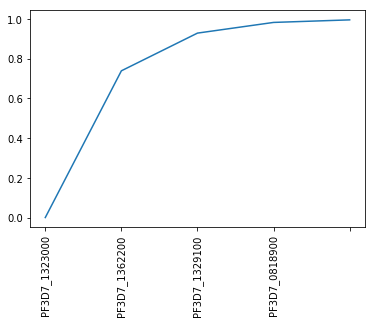

In [189]:
#N=100
x=np.arange(len(selected_scores))
y=selected_scores
plt.plot(x,y)
plt.xticks(x,selected_genes,rotation='vertical')
plt.show

### 11.3 Try the model with the three selected genes

In [190]:
selected_genes=['PF3D7_1323000','PF3D7_1362200','PF3D7_1329100','PF3D7_0818900']

In [191]:
def tryModel(genes,val_isolates,dfx,dfy):
    model_info={}
    
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=KernelRidge(alpha=1)
    model=model.fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    y_pred=model.predict(X_val)
    
    score=model.score(X_val,y_val)
    
    model_info['y']=y.values
    model_info['y_val']=y_val
    model_info['X']=X.values
    model_info['X_val']=X_val
    model_info['y_pred']=y_pred
    model_info['score']=score
    return model_info

In [192]:
try_model=tryModel(selected_genes,val_isolates,train,IC50)

In [193]:
y=[try_model['y_val'][i][0] for i in range(len(try_model['y_val']))]
y_pred=try_model['y_pred']

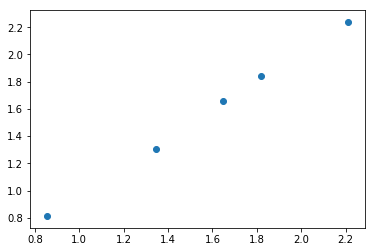

In [194]:
plt.scatter(y,y_pred)

### 11.4 Train the model with all the isolates and only the three selected genes

In [195]:
selected_genes

['PF3D7_1323000', 'PF3D7_1362200', 'PF3D7_1329100', 'PF3D7_0818900']

In [196]:
selected_train=train[getGenesColumnLabels(selected_genes)]
selected_train.head()

,PF3D7_1323000_24HR_DHA,PF3D7_1323000_24HR_UT,PF3D7_1323000_6HR_DHA,PF3D7_1323000_6HR_UT,PF3D7_1323000_24HR_6HR_DHA,PF3D7_1323000_24_6HR_UT,PF3D7_1323000_DHA_UT_6HR,PF3D7_1323000_DHA_UT_24HR,PF3D7_1362200_24HR_DHA,PF3D7_1362200_24HR_UT,...,PF3D7_1329100_DHA_UT_6HR,PF3D7_1329100_DHA_UT_24HR,PF3D7_0818900_24HR_DHA,PF3D7_0818900_24HR_UT,PF3D7_0818900_6HR_DHA,PF3D7_0818900_6HR_UT,PF3D7_0818900_24HR_6HR_DHA,PF3D7_0818900_24_6HR_UT,PF3D7_0818900_DHA_UT_6HR,PF3D7_0818900_DHA_UT_24HR
isolate_01,-0.582688,0.235317,-1.434863,-0.232308,0.852175,0.467625,-1.202555,-0.818005,-0.182778,0.036708,...,-0.107237,-0.560692,-0.092294,-0.115486,-0.140164,-0.013975,0.047870,-0.101511,-0.126189,0.023192
isolate_02,-0.667016,-0.437757,-0.588376,-0.899031,-0.078640,0.461274,0.310655,-0.229258,-0.593614,0.054427,...,0.571898,0.208086,-0.211738,-0.259239,-0.205179,-0.281821,-0.006559,0.022582,0.076642,0.047501
isolate_03,-1.177201,-1.029589,-0.615262,-0.441903,-0.561939,-0.587685,-0.173359,-0.147612,-0.570606,0.149118,...,0.511762,0.384362,-0.026326,-0.445878,0.079967,-0.817153,-0.106292,0.371275,0.897120,0.419553
isolate_04,-0.371501,-0.297039,-1.174709,-1.114182,0.803208,0.817143,-0.060527,-0.074462,-0.078809,-0.009189,...,-0.288026,-0.537069,-0.203014,-0.145778,-0.289756,-0.521688,0.086742,0.375910,0.231932,-0.057236
isolate_05,-1.194063,-0.726577,-0.772119,-0.086344,-0.421944,-0.640232,-0.685775,-0.467486,-0.371096,-0.036870,...,-0.517850,1.422708,0.247644,-0.794295,-0.223348,-0.028819,0.470992,-0.765476,-0.194528,1.041939


In [197]:
X=selected_train
y=IC50

model=KernelRidge(alpha=1)
model=model.fit(X.values,y.values)

### 11.5 Save the model

In [198]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(model, '../models/model5_150819.pkl') 

['../models/model5_150819.pkl']

### 11.6. Use the model1 on the test data

In [199]:
test.head()

,PF3D7_1320400_24HR_DHA,PF3D7_1320400_24HR_UT,PF3D7_1320400_6HR_DHA,PF3D7_1320400_6HR_UT,PF3D7_1330600_24HR_DHA,PF3D7_1330600_24HR_UT,PF3D7_1330600_6HR_DHA,PF3D7_1330600_6HR_UT,PF3D7_0718500_24HR_DHA,PF3D7_0718500_24HR_UT,...,PF3D7_1220900_DHA_UT_6HR,PF3D7_1220900_DHA_UT_24HR,PF3D7_0815700_24HR_6HR_DHA,PF3D7_0815700_24_6HR_UT,PF3D7_0815700_DHA_UT_6HR,PF3D7_0815700_DHA_UT_24HR,PF3D7_0806400_24HR_6HR_DHA,PF3D7_0806400_24_6HR_UT,PF3D7_0806400_DHA_UT_6HR,PF3D7_0806400_DHA_UT_24HR
isolate_31,-0.496219,-0.205819,-0.297698,-0.176457,-0.026993,-0.184111,-0.111504,0.021236,-0.363312,-0.667733,...,-0.235640,0.297858,-0.727671,0.331430,0.354194,-0.704907,0.436223,0.377827,-0.026954,0.031441
isolate_32,-0.410900,-0.570203,-0.282694,-0.846817,0.037439,-0.222429,0.518632,-0.891269,-0.017395,0.397179,...,0.747767,-0.005336,-0.315538,-0.900526,-0.440560,0.144428,-0.112116,-0.184576,0.216721,0.289182
isolate_33,0.126625,-0.134143,0.011314,-0.170277,-0.311933,0.192548,0.476600,-0.225284,-0.210986,-0.153042,...,0.299938,0.089551,-0.333410,0.351006,0.315305,-0.369111,-0.176616,-0.268314,-0.040697,0.051001
isolate_34,-0.001174,-0.040706,-0.373737,-0.645604,0.258427,0.103350,-0.426120,-0.104769,-0.153527,-0.015403,...,0.131564,0.125892,0.204306,0.721108,0.347970,-0.168831,-0.005535,0.777921,0.819739,0.036283
isolate_35,-0.119890,-0.425346,-0.626991,-0.443222,-0.262380,-0.317042,0.612304,-0.253117,0.061437,-0.093336,...,0.588694,-0.289170,0.003515,0.082447,-0.041141,-0.120072,0.506484,-0.419034,-0.763776,0.161742


### 11.6 Make the IC50 predictions

In [200]:
#Load the model
model_load = joblib.load('../models/model5_150819.pkl') 

In [201]:
selected_test=test[getGenesColumnLabels(selected_genes)]
selected_test.head()

,PF3D7_1323000_24HR_DHA,PF3D7_1323000_24HR_UT,PF3D7_1323000_6HR_DHA,PF3D7_1323000_6HR_UT,PF3D7_1323000_24HR_6HR_DHA,PF3D7_1323000_24_6HR_UT,PF3D7_1323000_DHA_UT_6HR,PF3D7_1323000_DHA_UT_24HR,PF3D7_1362200_24HR_DHA,PF3D7_1362200_24HR_UT,...,PF3D7_1329100_DHA_UT_6HR,PF3D7_1329100_DHA_UT_24HR,PF3D7_0818900_24HR_DHA,PF3D7_0818900_24HR_UT,PF3D7_0818900_6HR_DHA,PF3D7_0818900_6HR_UT,PF3D7_0818900_24HR_6HR_DHA,PF3D7_0818900_24_6HR_UT,PF3D7_0818900_DHA_UT_6HR,PF3D7_0818900_DHA_UT_24HR
isolate_31,0.362160,-0.006155,-0.803857,-0.796366,1.166017,0.790211,-0.007491,0.368315,-0.303298,-0.179782,...,-0.785088,0.463112,-0.123340,-0.516016,-0.176485,0.219132,0.053146,-0.735148,-0.395617,0.392676
isolate_32,-0.191774,-0.779432,-0.564029,-0.647686,0.372255,-0.131745,0.083657,0.587658,-0.210903,-0.489182,...,0.125713,-0.522159,-0.075937,0.150002,0.242583,-0.336617,-0.318520,0.486618,0.579199,-0.225939
isolate_33,-0.334484,-0.880449,-0.689893,-0.515219,0.355410,-0.365230,-0.174674,0.545966,0.114838,0.017443,...,0.295442,0.422695,-0.178803,-0.506534,0.230379,-0.449289,-0.409182,-0.057245,0.679668,0.327730
isolate_34,-0.718016,-0.967435,0.100222,-0.207841,-0.818238,-0.759594,0.308063,0.249419,-0.187246,-0.371007,...,-0.096872,-0.107334,-0.278627,-0.196599,-0.116313,0.184216,-0.162315,-0.380815,-0.300529,-0.082028
isolate_35,-0.129765,-0.360100,-0.167618,-0.486846,0.037852,0.126746,0.319228,0.230335,0.135629,-0.461348,...,1.186195,0.204827,-0.205279,0.061793,0.408609,-0.525774,-0.613888,0.587568,0.934383,-0.267072


In [202]:
X_test=selected_test
X_test.head()

,PF3D7_1323000_24HR_DHA,PF3D7_1323000_24HR_UT,PF3D7_1323000_6HR_DHA,PF3D7_1323000_6HR_UT,PF3D7_1323000_24HR_6HR_DHA,PF3D7_1323000_24_6HR_UT,PF3D7_1323000_DHA_UT_6HR,PF3D7_1323000_DHA_UT_24HR,PF3D7_1362200_24HR_DHA,PF3D7_1362200_24HR_UT,...,PF3D7_1329100_DHA_UT_6HR,PF3D7_1329100_DHA_UT_24HR,PF3D7_0818900_24HR_DHA,PF3D7_0818900_24HR_UT,PF3D7_0818900_6HR_DHA,PF3D7_0818900_6HR_UT,PF3D7_0818900_24HR_6HR_DHA,PF3D7_0818900_24_6HR_UT,PF3D7_0818900_DHA_UT_6HR,PF3D7_0818900_DHA_UT_24HR
isolate_31,0.362160,-0.006155,-0.803857,-0.796366,1.166017,0.790211,-0.007491,0.368315,-0.303298,-0.179782,...,-0.785088,0.463112,-0.123340,-0.516016,-0.176485,0.219132,0.053146,-0.735148,-0.395617,0.392676
isolate_32,-0.191774,-0.779432,-0.564029,-0.647686,0.372255,-0.131745,0.083657,0.587658,-0.210903,-0.489182,...,0.125713,-0.522159,-0.075937,0.150002,0.242583,-0.336617,-0.318520,0.486618,0.579199,-0.225939
isolate_33,-0.334484,-0.880449,-0.689893,-0.515219,0.355410,-0.365230,-0.174674,0.545966,0.114838,0.017443,...,0.295442,0.422695,-0.178803,-0.506534,0.230379,-0.449289,-0.409182,-0.057245,0.679668,0.327730
isolate_34,-0.718016,-0.967435,0.100222,-0.207841,-0.818238,-0.759594,0.308063,0.249419,-0.187246,-0.371007,...,-0.096872,-0.107334,-0.278627,-0.196599,-0.116313,0.184216,-0.162315,-0.380815,-0.300529,-0.082028
isolate_35,-0.129765,-0.360100,-0.167618,-0.486846,0.037852,0.126746,0.319228,0.230335,0.135629,-0.461348,...,1.186195,0.204827,-0.205279,0.061793,0.408609,-0.525774,-0.613888,0.587568,0.934383,-0.267072


In [203]:
IC50_pred=model_load.predict(X_test)

### 11.7 Format the predictions for submission

In [204]:
temp_list=[]
for value in IC50_pred:
    temp_list.append(value[0])
IC50_pred=temp_list

In [205]:
submission=pd.DataFrame({'Isolate':isolates_list_test,'Predicted_IC50':IC50_pred})

In [206]:
submission.head()

,Isolate,Predicted_IC50
0,isolate_31,1.053570
1,isolate_32,1.184980
2,isolate_33,0.875668
3,isolate_34,1.308534
4,isolate_35,0.067821


### 11.8 Save submissions to file

In [207]:
submission.to_csv('../submissions/lylat_SubCh1_model5_150819.txt', sep='\t',index=None)

## 14. Train the model usin KRR after KPCA on important genes

Use train and test data that only contain the important genes as found from steps 2 - 4 in the data_explore notebook.

In [173]:
train_PCA_30=pd.read_csv('../data/train_KPCA_30.csv', index_col=0)
test_PCA_30=pd.read_csv('../data/test_KPCA_30.csv', index_col=0)
IC50=pd.read_csv('../data/flat_IC50.csv',index_col=0)

In [143]:
X=train_PCA_30.values
X_test=test_PCA_30.values
y=IC50.values

### 14.1 Perform crossvalidation

In [156]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_validate
reg = KernelRidge(alpha=0.8)
scores = cross_validate(reg, X,y, scoring='r2', cv=5)

In [148]:
#alpha=1
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([-0.42650565, -1.08096814, -0.48092885, -0.31061224, -0.57433094])

In [149]:
#alpha=1
scores['test_score']

array([-136.55519829,  -46.84658957, -102.75297785, -219.92454546,
       -253.87446314])

In [151]:
#alpha=0.2
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.86491135, 0.78531512, 0.86636579, 0.86351211, 0.84791563])

In [152]:
#alpha=0.2
scores['test_score']

array([-257.71412968,  -86.3215084 , -193.20510798, -403.00413967,
       -513.85236608])

In [154]:
#alpha=0.5
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.4167619 , 0.11496521, 0.41037733, 0.44220476, 0.34918313])

In [155]:
#alpha=0.5
scores['test_score']

array([-194.79997841,  -65.64715722, -146.8563478 , -307.32411013,
       -376.90861916])

In [157]:
#alpha=0.8
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([-0.09522704, -0.61756207, -0.12635377, -0.01800658, -0.213422  ])

In [158]:
#alpha=0.8
scores['test_score']

array([-155.3515397 ,  -52.89162896, -117.11522204, -248.11633742,
       -293.11292347])

## 15. Train the model usin KRR after KPCA on important genes

Use train and test data that only contain the important genes as found from steps 2 - 4 in the data_explore notebook.

In [174]:
train_PCA_30=pd.read_csv('../data/train_KPCA_30.csv', index_col=0)
test_PCA_30=pd.read_csv('../data/test_KPCA_30.csv', index_col=0)
IC50=pd.read_csv('../data/flat_IC50.csv',index_col=0)

In [175]:
X=train_PCA_30.values
X_test=test_PCA_30.values
y=IC50.values

### 15.1 Perform crossvalidation

In [181]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
poly = PolynomialFeatures(3)
X_ =poly.fit_transform(X)
predict_=poly.fit_transform(y)
reg = linear_model.LinearRegression()
scores = cross_validate(reg, X_,y, scoring='r2', cv=5)

In [179]:
#degree=2
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([1., 1., 1., 1., 1.])

In [180]:
#degree=2
scores['test_score']

array([-0.19457568, -0.31157891, -0.19260019, -0.55908457, -0.93483827])

In [182]:
#degree=3
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([1., 1., 1., 1., 1.])

In [183]:
#degree=3
scores['test_score']

array([-0.20369391, -0.31747801,  0.02877661, -0.56689358, -1.31891124])

## 16. KRR KPCA

In [208]:
train_PCA_30=pd.read_csv('../data/train_KPCA_30.csv', index_col=0)
test_PCA_30=pd.read_csv('../data/test_KPCA_30.csv', index_col=0)
IC50=pd.read_csv('../data/flat_IC50.csv',index_col=0)

In [209]:
train_PCA_30.head()

,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,...,component19,component20,component21,component22,component23,component24,component25,component26,component27,component28
isolate_01,0.855442,-0.472970,1.901321,0.540272,-0.164262,1.378649,-0.087422,1.080168,1.406046,0.501912,...,-0.125647,0.146947,0.004725,0.062196,-0.038486,-0.020817,0.015966,-0.040886,0.006138,0.014636
isolate_02,-0.294937,-0.094889,-0.415360,-0.013869,0.074343,-0.024556,-0.149523,0.018164,0.007472,0.191945,...,0.137268,0.116966,0.239059,0.411837,-0.054205,-0.122467,0.123959,-0.139064,-1.178237,0.096424
isolate_03,-2.683168,1.008550,0.026654,0.216388,-0.166778,0.144331,-1.101647,0.241857,0.870913,-0.678470,...,-0.106840,-0.014089,-0.062692,-0.041208,0.032225,0.037344,-0.018574,0.013455,0.083786,0.001119
isolate_04,0.424188,-0.028240,0.126848,0.131625,-0.468503,-0.190703,0.037089,-0.041926,-0.346738,-0.276255,...,0.050131,-0.049565,0.043768,0.804699,1.104823,-0.794988,-0.012154,0.453306,0.156504,0.036931
isolate_05,0.070782,-0.772040,-0.672431,0.171722,1.538923,-0.597955,-0.012666,-0.641139,1.069180,-0.683365,...,-0.180733,0.206127,-0.026392,-0.061657,0.098443,0.061930,0.048743,0.053784,0.084953,-0.013224


In [211]:
components_list=list(train_PCA_30.columns)
components_list

['component0',
 'component1',
 'component2',
 'component3',
 'component4',
 'component5',
 'component6',
 'component7',
 'component8',
 'component9',
 'component10',
 'component11',
 'component12',
 'component13',
 'component14',
 'component15',
 'component16',
 'component17',
 'component18',
 'component19',
 'component20',
 'component21',
 'component22',
 'component23',
 'component24',
 'component25',
 'component26',
 'component27',
 'component28']

In [212]:
#Global variables
#val_isolates
#genes_dict
val_isolates=['isolate_07','isolate_11','isolate_16','isolate_18','isolate_27']

In [213]:
def findTrainIsolates(val_isolates,df):
#Takes a list of isolates chosen to be the validation set and the train df.
#Returns the isolates not in val_isolates
    train_isolates=list(set(df.index)-set(val_isolates))
    train_isolates.sort()
    return train_isolates

In [215]:
def filterDfByComponents(components,df):
#Takes a list of genes e.g.['PF3D7_1360200','PF3D7_1212800'] and a dataframe
#Returns the columns of the dataframe whose labels are in genes
    filtered_df=df[components]
    return filtered_df

In [214]:
def filterDfByIsolates(isolates,df):
#Takes a list of isolates and a dataframe
#Returns the rows of the dataframe whose index are in isolates
    filtered_df=df.loc[isolates]
    return filtered_df

In [227]:
def trainModelKRRComponent(components,val_isolates,dfx,dfy):
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByComponents(components,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=KernelRidge(alpha=5)
    model=model.fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByComponents(components,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    score=model.score(X_val,y_val)
    
    return score

In [228]:
selected_components=[]
selected_scores=[0]
N=100
for i in range(N):
    best_component_so_far=''
    best_score_so_far=selected_scores[-1]
    
    for component in components_list:
        
        if component not in selected_components:
            components_to_use=selected_components+[component]
            
            model_score=trainModelKRRComponent(components_to_use,val_isolates,train_PCA_30,IC50)
            
            if model_score > best_score_so_far:
                best_score_so_far=model_score
                best_component_so_far=component

    
    if best_score_so_far>selected_scores[-1]:
        selected_component.append(best_component_so_far)
        selected_scores.append(best_score_so_far)

In [229]:
selected_scores

[0]

In [226]:
selected_components

[]